### **TP3 KNN**

In [ ]:
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [ ]:
dataset=sklearn.datasets.load_digits()
print(dataset.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

La taille de cette dataset:5620

Le nombre de classe de cette dataset:10

Le nombre d'attribut de cette dataset:64


In [ ]:
train_x,test_x,train_y,test_y=train_test_split(dataset.images,dataset.target)

#train_test_split a par defaut la config 70% 30%

nsamples, nx, ny = train_x.shape
train_x = train_x.reshape((nsamples,nx*ny))

nsamples, nx, ny = test_x.shape
test_x =test_x.reshape((nsamples,nx*ny))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import time
start_time = time.time()
# Instructions

model=KNeighborsClassifier(3)

model.fit(train_x,train_y)
y_pred=model.predict(test_x)
from sklearn.metrics import recall_score, precision_score
print("precision:"+str(recall_score(test_y, y_pred,average='micro')))
print("recall:"+str(precision_score(test_y, y_pred,average='micro')))
print("--- %s seconds ---" % (time.time() - start_time))

precision:0.9955555555555555
recall:0.9955555555555555
--- 0.0958106517791748 seconds ---


Variation de K

In [ ]:
x=[]
p=[]

for i in range(1,20,2):
  start_time = time.time()
  model=KNeighborsClassifier(i)
  print("k="+str(i))
  model.fit(train_x,train_y)
  y_pred=model.predict(test_x)
  print("precision="+str(precision_score(test_y, y_pred,average='micro')))
  print("recall="+str( recall_score(test_y, y_pred,average='micro')))
  print("--- %s seconds ---" % (time.time() - start_time))
  x.append(i)
  p.append(precision_score(test_y, y_pred,average='micro'))
 

k=1
precision=0.9933333333333333
recall=0.9933333333333333
--- 0.08678817749023438 seconds ---
k=3
precision=0.9955555555555555
recall=0.9955555555555555
--- 0.08939743041992188 seconds ---
k=5
precision=0.9933333333333333
recall=0.9933333333333333
--- 0.09572792053222656 seconds ---
k=7
precision=0.9888888888888889
recall=0.9888888888888889
--- 0.09388232231140137 seconds ---
k=9
precision=0.9844444444444445
recall=0.9844444444444445
--- 0.09136104583740234 seconds ---
k=11
precision=0.9866666666666667
recall=0.9866666666666667
--- 0.0993647575378418 seconds ---
k=13
precision=0.9844444444444445
recall=0.9844444444444445
--- 0.0939631462097168 seconds ---
k=15
precision=0.9777777777777777
recall=0.9777777777777777
--- 0.09449553489685059 seconds ---
k=17
precision=0.9733333333333334
recall=0.9733333333333334
--- 0.10137009620666504 seconds ---
k=19
precision=0.9733333333333334
recall=0.9733333333333334
--- 0.10138535499572754 seconds ---


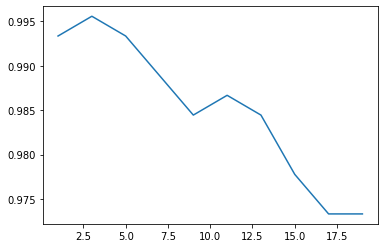

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x,p)
plt.show()